In [27]:
%pylab inline
import networkx as nx
import pandas as pd
import random
from flask import jsonify
import json
from tqdm import tqdm
import pickle

Populating the interactive namespace from numpy and matplotlib


C:\Users\chris\Anaconda2\envs\tensorflow\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['dist', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
treesR=pd.read_json("scrape/data.json")

In [7]:
treesR.head()

,geometry,id,properties,type
0,"{'coordinates': [13.35941149127144, 52.4918145...",97628,"{'species': 'Ulmus minor', 'created': '2018-11...",Feature
1,"{'coordinates': [13.386516547958214, 52.504274...",98420,"{'species': 'Acer platanoides', 'created': '20...",Feature
2,"{'coordinates': [13.386437701551193, 52.504344...",98421,"{'species': 'Betula spec.', 'created': '2018-1...",Feature
3,"{'coordinates': [13.386546177518802, 52.504366...",98422,"{'species': 'Sorbus aucuparia', 'created': '20...",Feature
4,"{'coordinates': [13.386542677646764, 52.504134...",98423,"{'species': 'Betula spec.', 'created': '2018-1...",Feature


In [8]:
co=[t['coordinates'] for t in treesR.geometry]
x,y=transpose(co)
id=treesR.id

In [9]:
len(x)

6312

In [35]:

trees=pd.DataFrame({'id':id,'x':x,'y':y})[:500]
trees.tail()

,id,x,y
495,222639,13.406854,52.492658
496,222640,13.406871,52.492636
497,222641,13.406821,52.492607
498,222790,13.381131,52.502455
499,222791,13.380800,52.502428


In [36]:
import scipy.spatial.distance

In [31]:
scipy.spatial.distance.pdist([[0,0,1],[1,1,3]],'euclidean')

array([2.44948974])

In [37]:
G=nx.Graph()
for _,(i1,x1,y1) in tqdm(trees.iterrows(),total=len(trees)):
    for _,(i2,x2,y2) in trees.iterrows():
        if i1 < i2:
            dist = (x1-x2)**2+(y1-y2)**2
            #print(dist)
            if dist<0.0008:
                G.add_edge(i1, i2,weight=dist)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [00:13<00:00, 38.19it/s]


In [34]:
trees.tail()

,id,x,y
495,222639,13.406854,52.492658
496,222640,13.406871,52.492636
497,222641,13.406821,52.492607
498,222790,13.381131,52.502455
499,222791,13.380800,52.502428


In [38]:
routing_data=[G,trees]

In [39]:
pickle.dump(routing_data,open( "../routing_data.pickle", "wb" ))

In [43]:
[G,trees]=pickle.load(open( "../routing_data.pickle", "rb" ))

[(97628, 13.35941149127144, 52.49181452951205), (96600.0, 13.359347980185852, 52.491979531917586), (116378.0, 13.359392872978475, 52.49205492047499), (118860.0, 13.359332137482363, 52.49216093892442), (96599.0, 13.359279086366195, 52.49223684644748), (118861.0, 13.359438234706628, 52.49246845486399), (116418.0, 13.359471605660442, 52.49260052567308), (116644.0, 13.359652851210909, 52.49272675369397), (117455.0, 13.359710369141462, 52.49274411923733), (95756.0, 13.359741638736846, 52.49268538112782), (116101.0, 13.359753748166723, 52.492568389799644), (119970.0, 13.35993990336516, 52.49255010859922), (116691.0, 13.36019303052591, 52.49251671795094), (119971.0, 13.360344497066304, 52.49256186708179), (116128.0, 13.360482873006763, 52.492579774816996), (222400.0, 13.37723605704918, 52.48916215056674), (221115.0, 13.37773065819272, 52.48909314187421), (220983.0, 13.37897645956575, 52.489316027129114), (221114.0, 13.379441679493215, 52.48927698341977), (220982.0, 13.380654515181993, 52.4890

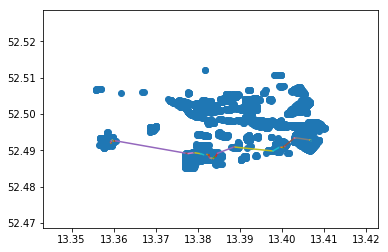

In [44]:
def getPath(start_id,end_id):
    p= nx.algorithms.shortest_paths.weighted.dijkstra_path(G,start_id,end_id)
    return [(i,x[trees[trees.id==i].index][0],y[trees[trees.id==i].index][0]) for i in p]  

path=getPath(97628,222640)
print(path)
scatter(x,y)
for [i1,x1,y1],[i2,x2,y2] in zip(path[:-1],path[1:]):
    plot([x1,x2],[y1,y2])
    